In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [15]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[163.22597756 197.72311134 120.58332123]
 [107.69008695  95.56129696  71.60061825]]
[[160.65611074 204.76011326 114.7158908 ]
 [ 58.41504271  55.22977442  46.15505295]
 [143.96627768 128.33631658  97.25429875]
 [184.00195745 182.80259219 165.00190044]]
[[163.40536576 211.83403765 117.66127804]
 [114.04366072  98.37758716  66.86554312]
 [169.49346405 163.27745471 141.33566938]
 [ 37.82832261  40.17195433  40.89186694]
 [148.40136912 132.66767149 102.7129189 ]
 [197.88614062 198.9694508  186.32612181]
 [220.36951384 190.8853815   36.83828494]
 [154.67414514 192.73292397 110.88828722]]
[[164.81846664 214.01493454 118.70817262]
 [ 95.64598174  79.27393986  48.24439451]
 [142.95765706 128.41407234  98.32291521]
 [188.56303476 188.24092024 177.03913122]
 [157.091287   192.90680589 112.13824612]
 [ 26.71084879  27.62338392  26.04019112]
 [120.50934111 107.5989775   76.04833007]
 [228.90761575 203.27996538  37.15166595]
 [ 46.29567438  56.98947613  69.55242591]
 [159.70201134 146.26327933 119

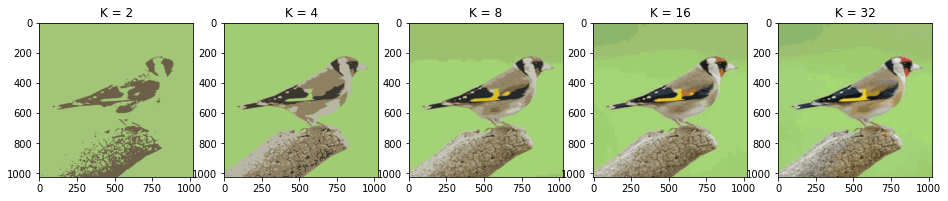

In [25]:
h, w, c = img.shape
#print(img.shape)

z = img.reshape((-1,3))
z.shape
ka=[2,4,8,16,32]
plt.figure(figsize=(16,12))
for i, k in enumerate(ka):
    label, center = km_clust(z, k)
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)
    
    plt.subplot(1, len(ka), i+1)
    plt.title('K = {}'.format(k))
    plt.imshow(res)

## 1-2. cluster with RGB values and the location

[[157.9315658  193.12102331 119.94242176 122.24493453  60.93994439]
 [153.23062402 174.75152003 108.17216536 132.89922234 187.60727196]]
[[114.24997454 102.21383516  76.20849183 173.8882228  137.40618018]
 [157.8775898  192.3353312  112.38174458  45.49939038 126.8045328 ]
 [166.1304204  200.19541949 129.36573729 165.69126314  51.01534285]
 [167.57497342 206.36181482 123.00606752 170.44248845 211.59657297]]
[[164.64763906 211.27011488 120.46384967 194.38920378 212.20106583]
 [156.15588661 200.89074274 114.50783209  67.04214831  41.92742703]
 [132.35640304 120.06369147  90.50353682 218.3392344  127.8821178 ]
 [162.52529642 144.71671725 105.43678625 123.65225342 156.67980708]
 [167.97197572 200.54246954 133.52184965 187.74497909  52.88940208]
 [ 46.9524728   47.93061235  45.90057352 116.79692925 136.60599105]
 [158.13134343 199.71741879 110.70306002  45.36505458 126.11963302]
 [166.63685281 198.50072859 122.25161276  56.51338398 220.70429449]]
[[165.06491078 207.96539717 111.08557222  82.

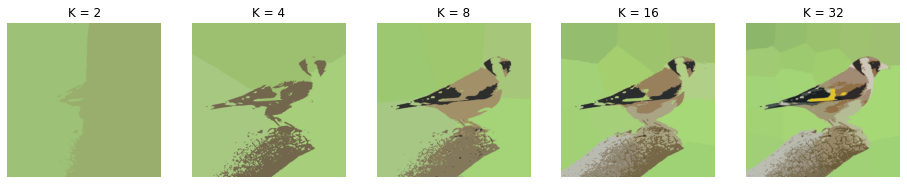

In [27]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

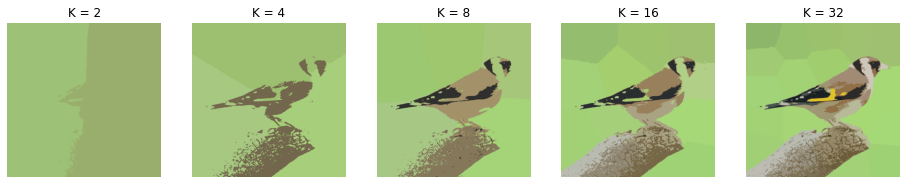